In [ ]:
'''
A Deep Learning Neural Network made from Fully Connected Layers
for the MNIST DATA for Hand Written Numbers
Made From SCRATCHZZZSSSXXX
'''

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd

In [ ]:
# train_csv = pd.read_csv("C:\\Users\\CastroPC\\Desktop\\train.csv")
# test_csv = pd.read_csv("C:\\Users\\CastroPC\\Desktop\\test.csv")

# train_DF = pd.DataFrame(train_csv)
# test_DF = pd.DataFrame(test_csv)


# TrainingDataTarget = []
# TrainingDataValue = []
# TestData = []

# for i in tqdm(range(len(train_DF))):
#    if train_DF.loc[i][0] == 0:
#        target = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 1:
#        target = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 2:
#        target = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 3:
#        target = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 4:
#        target = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 5:
#        target = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
#    elif train_DF.loc[i][0] == 6:
#        target = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
#    elif train_DF.loc[i][0] == 7:
#        target = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
#    elif train_DF.loc[i][0] == 8:
#        target = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
#    elif train_DF.loc[i][0] == 9:
#        target = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
#    TrainingDataValue.append(train_DF.loc[i][1:])
#    TrainingDataTarget.append(target)
# for i in tqdm(range(len(test_DF))):
#    TestData.append(np.array(test_DF.loc[i]))

# np.save("C:\\Users\\CastroPC\\Desktop\\TrainingDataTarget", TrainingDataTarget)
# np.save("C:\\Users\\CastroPC\\Desktop\\TrainingDataValue", TrainingDataValue)
# np.save("C:\\Users\\CastroPC\\Desktop\\TestData", TestData)

In [2]:
def stablesoftmax(x):
    """Compute the softmax of vector x in a numerically stable way."""
    shiftx = x - np.max(x)
    exps = np.exp(shiftx)
    return exps / np.sum(exps)

def dtanH(x):
    return 1 - np.tanh(x)**2

def tanH(x):
    return np.tanh(x)

def ReLU(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

def softmax_d(z):
    return softmax_broadcast(z) * (1 - softmax_broadcast(z))

def cross_ent(y, yhat):
    return -1 * np.sum(y * np.log(yhat+1e-16))

#def cross_entropy(predictions, targets, epsilon=1e-12):
#    """
#    Computes cross entropy between targets (encoded as one-hot vectors)
#    and predictions. 
#    Input: predictions (N, k) ndarray
#           targets (N, k) ndarray        
#    Returns: scalar
#    """
#    predictions = np.clip(predictions, epsilon, 1. - epsilon)
#    N = predictions.shape[0]
#    ce = -np.sum(targets*np.log(predictions+1e-9))/N
#    return ce

def cross_ent_d(y, yhat):
    return yhat - y

def softmax_broadcast(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] # dito
    return e_x / div

In [33]:

# w1 = np.random.randn(784, 300)
# b1 = np.random.randn(1, 300)

# w2 = np.random.randn(300, 280)
# b2 = np.random.randn(1, 280)

# w3 = np.random.randn(280, 280)
# b3 = np.random.randn(1, 280)

# w4 = np.random.randn(280, 250)
# b4 = np.random.randn(1, 250)

# w5 = np.random.randn(250, 250)
# b5 = np.random.randn(1, 250)

# w6 = np.random.randn(250, 200)
# b6 = np.random.randn(1, 200)

# w7 = np.random.randn(200, 200)
# b7 = np.random.randn(1, 200)

# w8 = np.random.randn(200, 180)
# b8 = np.random.randn(1, 180)

# w9 = np.random.randn(180, 180)
# b9 = np.random.randn(1, 180)

# w10 = np.random.randn(180, 100)
# b10 = np.random.randn(1, 100)

# w11 = np.random.randn(100, 50)
# b11 = np.random.randn(1, 50)

# w12 = np.random.randn(50, 50)
# b12 = np.random.randn(1, 50)

# w13 = np.random.randn(50, 30)
# b13 = np.random.randn(1, 30)

# w14 = np.random.randn(30, 10)
# b14 = np.random.randn(1, 10)

In [20]:
w1 = np.load("weights1.npy")
w2 = np.load("weights2.npy")
w3 = np.load("weights3.npy")
w4 = np.load("weights4.npy")
w5 = np.load("weights5.npy")
w6 = np.load("weights6.npy")
w7 = np.load("weights7.npy")
w8 = np.load("weights8.npy")
w9 = np.load("weights9.npy")
w10 = np.load("weights10.npy")
w11 = np.load("weights11.npy")
w12 = np.load("weights12.npy")
w13 = np.load("weights13.npy")
w14 = np.load("weights14.npy")

b1 = np.load("bias1.npy")
b2 = np.load("bias2.npy")
b3 = np.load("bias3.npy")
b4 = np.load("bias4.npy")
b5 = np.load("bias5.npy")
b6 = np.load("bias6.npy")
b7 = np.load("bias7.npy")
b8 = np.load("bias8.npy")
b9 = np.load("bias9.npy")
b10 = np.load("bias10.npy")
b11 = np.load("bias11.npy")
b12 = np.load("bias12.npy")
b13 = np.load("bias13.npy")
b14 = np.load("bias14.npy")

In [34]:
costlist = []
TrainingDataTarget = np.load("C:\\Users\\CastroPC\\Desktop\\TrainingDataTarget.npy", allow_pickle=True)
TrainingDataValue = np.load("C:\\Users\\CastroPC\\Desktop\\TrainingDataValue.npy", allow_pickle=True)

In [45]:
iterations = 5
lr = 0.0001

In [46]:

for i in tqdm(range(iterations)):

    InputData1 = TrainingDataValue
    TargetData1 = TrainingDataTarget

    z1 = np.dot(InputData1, w1) + b1
    a1 = tanH(z1)
    #a1 - 42000 x 1200  

    z2 = np.dot(a1, w2) + b2
    a2 = ReLU(z2)
    #a2 - 42000 x 1000

    z3 = np.dot(a2, w3) + b3
    a3 = tanH(z3)
    #a3 - 42000 x 1000

    z4 = np.dot(a3, w4) + b4
    a4 = ReLU(z4)
    #a4 - 42000 x 900

    z5 = np.dot(a4, w5) + b5
    a5 = tanH(z5)

    z6 = np.dot(a5, w6) + b6
    a6 = ReLU(z6)

    z7 = np.dot(a6, w7) + b7
    a7 = tanH(z7)

    z8 = np.dot(a7, w8) + b8
    a8 = ReLU(z8)

    z9 = np.dot(a8, w9) + b9
    a9 = tanH(z9)

    z10 = np.dot(a9, w10) + b10
    a10 = ReLU(z10)

    z11 = np.dot(a10, w11) + b11
    a11 = tanH(z11)

    z12 = np.dot(a11, w12) + b12
    a12 = ReLU(z12)

    z13 = np.dot(a12, w13) + b13
    a13 = tanH(z13)

    z14 = np.dot(a13, w14) + b14
    a14 = softmax_broadcast(z14)


    cost = cross_ent(TargetData1, a14)
    costlist.append(cost)
    print(cost)

    #backprop
    dcda14 = cross_ent_d(TargetData1, a14)
    da14dz14 = softmax_d(z14)
    dz14dw14 = a13

    dw14 = dcda14 * da14dz14
    db14 = np.sum(dw14, axis=0, keepdims=True)
    w14 = w14 - lr * np.dot(dz14dw14.T, dw14)
    b14 = b14 - lr * db14


    dz14da13 = w14
    da13dz13 = dtanH(z13)
    dz13dw13 = a12

    dw13 = np.dot(dw14, dz14da13.T) * da13dz13
    db13 = np.sum(dw13, axis=0, keepdims=True)
    w13 = w13 - lr * np.dot(dz13dw13.T, dw13)
    b13 = b13 - lr * db13


    dz13da12 = w13
    da12dz12 = dReLU(z12)
    dz12dw12 = a11

    dw12 = np.dot(dw13, dz13da12.T) * da12dz12
    db12 = np.sum(dw12, axis=0, keepdims=True)
    w12 = w12 - lr * np.dot(dz12dw12.T, dw12)
    b12 = b12 - lr * db12


    dz12da11 = w12
    da11dz11 = dtanH(z11)
    dz11dw11 = a10

    dw11 = np.dot(dw12, dz12da11.T) * da11dz11
    db11 = np.sum(dw11, axis=0, keepdims=True)
    w11 = w11 - lr * np.dot(dz11dw11.T, dw11)
    b11 = b11 - lr * db11


    dz11da10 = w11
    da10dz10 = dReLU(z10)
    dz10dw10 = a9

    dw10 = np.dot(dw11, dz11da10.T) * da10dz10
    db10 = np.sum(dw10, axis=0, keepdims=True)
    w10 = w10 - lr * np.dot(dz10dw10.T, dw10)
    b10 = b10 - lr * db10


    dz10da9 = w10
    da9dz9 = dtanH(z9)
    dz9dw9 = a8

    dw9 = np.dot(dw10, dz10da9.T) * da9dz9
    db9 = np.sum(dw9, axis=0, keepdims=True)
    w9 = w9 - lr * np.dot(dz9dw9.T, dw9)
    b9 = b9 - lr * db9


    dz9da8 = w9
    da8dz8 = dReLU(z8)
    dz8dw8 = a7

    dw8 = np.dot(dw9, dz9da8.T) * da8dz8
    db8 = np.sum(dw8, axis=0, keepdims=True)
    w8 = w8 - lr * np.dot(dz8dw8.T, dw8)
    b8 = b8 - lr * db8


    dz8da7 = w8
    da7dz7 = dtanH(z7)
    dz7dw7 = a6

    dw7 = np.dot(dw8, dz8da7.T) * da7dz7
    db7 = np.sum(dw7, axis=0, keepdims=True)
    w7 = w7 - lr * np.dot(dz7dw7.T, dw7)
    b7 = b7 - lr * db7


    dz7da6 = w7
    da6dz6 = dReLU(z6)
    dz6dw6 = a5

    dw6 = np.dot(dw7, dz7da6.T) * da6dz6
    db6 = np.sum(dw6, axis=0, keepdims=True)
    w6 = w6 - lr * np.dot(dz6dw6.T, dw6)
    b6 = b6 - lr * db6

    dz6da5 = w6
    da5dz5 = dtanH(z5)
    dz5dw5 = a4

    dw5 = np.dot(dw6, dz6da5.T) * da5dz5
    db5 = np.sum(dw5, axis=0, keepdims=True)
    w5 = w5 - lr * np.dot(dz5dw5.T, dw5)
    b5 = b5 - lr * db5

    dz5da4 = w5
    da4dz4 = dReLU(z4)
    dz4dw4 = a3

    dw4 = np.dot(dw5, dz5da4.T) * da4dz4
    db4 = np.sum(dw4, axis=0, keepdims=True)
    w4 = w4 - lr * np.dot(dz4dw4.T, dw4)
    b4 = b4 - lr * db4

    dz4da3 = w4
    da3dz3 = dtanH(z3)
    dz3dw3 = a2

    dw3 = np.dot(dw4, dz4da3.T) * da3dz3
    db3 = np.sum(dw3, axis=0, keepdims=True)
    w3 = w3 - lr * np.dot(dz3dw3.T, dw3)
    b3 = b3 - lr * db3

    dz3da2 = w3
    da2dz2 = dReLU(z2)
    dz2dw2 = a1

    dw2 = np.dot(dw3, dz3da2.T) * da2dz2
    db2 = np.sum(dw2, axis=0, keepdims=True)
    w2 = w2 - lr * np.dot(dz2dw2.T, dw2)
    b2 = b2 - lr * db2

    dz2da1 = w2
    da1dz1 = dtanH(z1)
    dz1dw1 = InputData1

    dw1 = np.dot(dw2, dz2da1.T) * da1dz1
    db1 = np.sum(dw1, axis=0, keepdims=True)
    w1 = w1 - lr * np.dot(dz1dw1.T, dw1)
    b1 = b1 - lr * db1



  0%|          | 0/5 [00:00<?, ?it/s]

96648.75774670344




 20%|██        | 1/5 [00:03<00:14,  3.62s/it]

96648.75774670343




 40%|████      | 2/5 [00:07<00:11,  3.71s/it]

96648.75774670344




 60%|██████    | 3/5 [00:10<00:07,  3.53s/it]

96648.75774670343




 80%|████████  | 4/5 [00:14<00:03,  3.72s/it]

96648.75774670344




100%|██████████| 5/5 [00:18<00:00,  3.81s/it]



[369797.451830094, 312580.89862715953, 416365.5773052604, 290966.50310648343, 212969.76143918623, 197339.78355557896, 210514.89495373465, 204908.37354286498, 213825.10959403004, 198168.9444619309, 196198.54918251224, 202304.56016577204, 218469.24378010005, 221757.31340044766, 228449.1466751185, 229845.82694310526, 211439.51994505228, 213588.42731779077, 201990.4939672005, 210009.16647491933, 226670.57854610527, 174038.29155107946, 176338.81407002726, 160411.10920542417, 159658.2831399361, 150660.05616222776, 145124.23244851825, 147502.38361008666, 147453.40033009913, 138298.17084975087, 118565.23640394968, 112820.60074314052, 112095.5426997349, 106941.90840240492, 104039.05806452579, 101297.32106041818, 99813.22799392772, 98781.13097418206, 97868.06004260869, 97133.25524151827, 96735.4176389486, 96650.50729437199, 96648.78139224934, 96648.76032467991, 96648.75816110108, 96648.75781554666, 96648.75775825411, 96648.75774864007, 96648.75774702846, 96648.75774675794, 96648.75774671255, 966

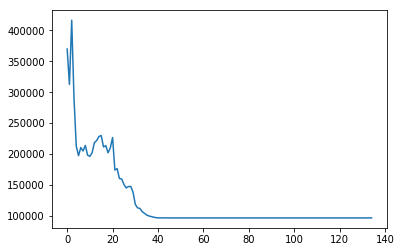

In [47]:
print(costlist)
plt.plot(costlist)
plt.show()

In [44]:
np.save("weights1", w1)
np.save("weights2", w2)
np.save("weights3", w3)
np.save("weights4", w4)
np.save("weights5", w5)
np.save("weights6", w6)
np.save("weights7", w7)
np.save("weights8", w8)
np.save("weights9", w9)
np.save("weights10", w10)
np.save("weights11", w11)
np.save("weights12", w12)
np.save("weights13", w13)
np.save("weights14", w14)

np.save("bias1", b1)
np.save("bias2", b2)
np.save("bias3", b3)
np.save("bias4", b4)
np.save("bias5", b5)
np.save("bias6", b6)
np.save("bias7", b7)
np.save("bias8", b8)
np.save("bias9", b9)
np.save("bias10", b10)
np.save("bias11", b11)
np.save("bias12", b12)
np.save("bias13", b13)
np.save("bias14", b14)